# What Best way For measuring Distance In K-NN  Machine Learning (ML) Model 

* [Introduction](#section-zero)
* [Training & Testing ML Models](#section-one)
 
    * [K Nearest Neighbors (KNN)](#section-two)
       * [Raining Dataset](#section-two)
       * [Tumor Dataset](#section-two)
       * [Iris Dataset](#section-two)

* [Comparing ML Models](#section-four)
* [Conclusion](#section-five)

<a id="section-zero"></a>
# Introduction
### Is the Measuring Method Increase Efficiency Of Model?,in this Paper will Compare Measuring Method to See accurcy Measuring Method in diffent 3 size , Dimstion, DataSets 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read and display data.

In [ ]:
# Set working directory and read data
raining_dataset = pd.read_csv('/content/drive/MyDrive/paper/DataT_RR.csv') 
tumor_dataset= pd.read_csv("/content/drive/MyDrive/paper/tumor_KNNAlgorithmDataset.csv")
iris_dataset=pd.read_csv('/content/drive/MyDrive/paper/IRIS.csv')

# Working With Raining Dataset

In [ ]:
raining_dataset.info()
raining_dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stasiun      923 non-null    object 
 1   Tanggal      923 non-null    object 
 2   Tn           923 non-null    float64
 3   Tx           923 non-null    float64
 4   Tavg         923 non-null    float64
 5   RR           923 non-null    float64
 6   Hari_hujan   923 non-null    int64  
 7   Besok_hujan  923 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 57.8+ KB


,Stasiun,Tanggal,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
0,Stasiun Meteorologi Nangapinoh,20-03-2010,20.3,31.1,25.8,108.0,1,1
1,Stasiun Meteorologi Maritim Tanjung Mas,07-03-2010,25.0,31.8,29.2,106.0,1,1
2,Stasiun Klimatologi Mempawah,09-01-2009,23.4,29.6,25.8,100.6,1,1
3,Stasiun Meteorologi Cilacap,09-01-2009,23.6,28.0,25.6,93.9,1,1
4,Stasiun Klimatologi Bogor,21-01-2009,21.1,29.4,25.5,93.0,1,1
...,...,...,...,...,...,...,...,...
918,Stasiun Klimatologi Bogor,09-03-2009,22.4,32.5,25.9,0.0,0,0
919,Stasiun Klimatologi Bogor,18-03-2009,21.2,33.0,26.6,0.0,0,0
920,Stasiun Klimatologi Bogor,19-03-2009,21.3,31.8,25.2,0.0,0,0
921,Stasiun Klimatologi Bogor,21-03-2009,21.6,32.4,26.1,0.0,0,0


Replace Coloum Value To Numeric Value To Train The model

In [ ]:
# Remove the 1st column (Unnamed).

raining_dataset = raining_dataset.iloc[:,2:]
print(raining_dataset.shape)
# Rename "targets" column to "is_fraud".
raining_dataset.rename(columns={'Besok_hujan': 'is_raining'}, inplace=True) 


# Check for any null values in each column
print(f'Null Values: {sum(raining_dataset.isnull().sum())}')
raining_dataset

(923, 6)
Null Values: 0


,Tn,Tx,Tavg,RR,Hari_hujan,is_raining
0,20.3,31.1,25.8,108.0,1,1
1,25.0,31.8,29.2,106.0,1,1
2,23.4,29.6,25.8,100.6,1,1
3,23.6,28.0,25.6,93.9,1,1
4,21.1,29.4,25.5,93.0,1,1
...,...,...,...,...,...,...
918,22.4,32.5,25.9,0.0,0,0
919,21.2,33.0,26.6,0.0,0,0
920,21.3,31.8,25.2,0.0,0,0
921,21.6,32.4,26.1,0.0,0,0


Separate dataset into features (inputs) and targets (outputs). Verify all features are numerical and split dataset into training (80%) and testing (20%).

In [ ]:
test_data_fraction = 0.20 # Allocate 20% of the data for testing.
random_seed = 25

X = raining_dataset.iloc[:,0:-1] # Features (inputs).
y = raining_dataset.is_raining # Target (output).

# Verify all features are numerical
print(f'Feature Datatypes\n-----------------\n'
      f'{X.dtypes.value_counts()}\n')

# Split data into training (80%) and testing (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_fraction, 
                                                    random_state=random_seed)
# Obtain shape of training and testing data.
print('Training Shape\n--------------')
print(f'Input: {X_train.shape}')
print(f'Output: {y_train.shape}')

print('\nTesting Shape\n--------------')
print(f'Input: {X_test.shape}')
print(f'Output: {y_test.shape}')

Feature Datatypes
-----------------
float64    4
int64      1
dtype: int64

Training Shape
--------------
Input: (738, 5)
Output: (738,)

Testing Shape
--------------
Input: (185, 5)
Output: (185,)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


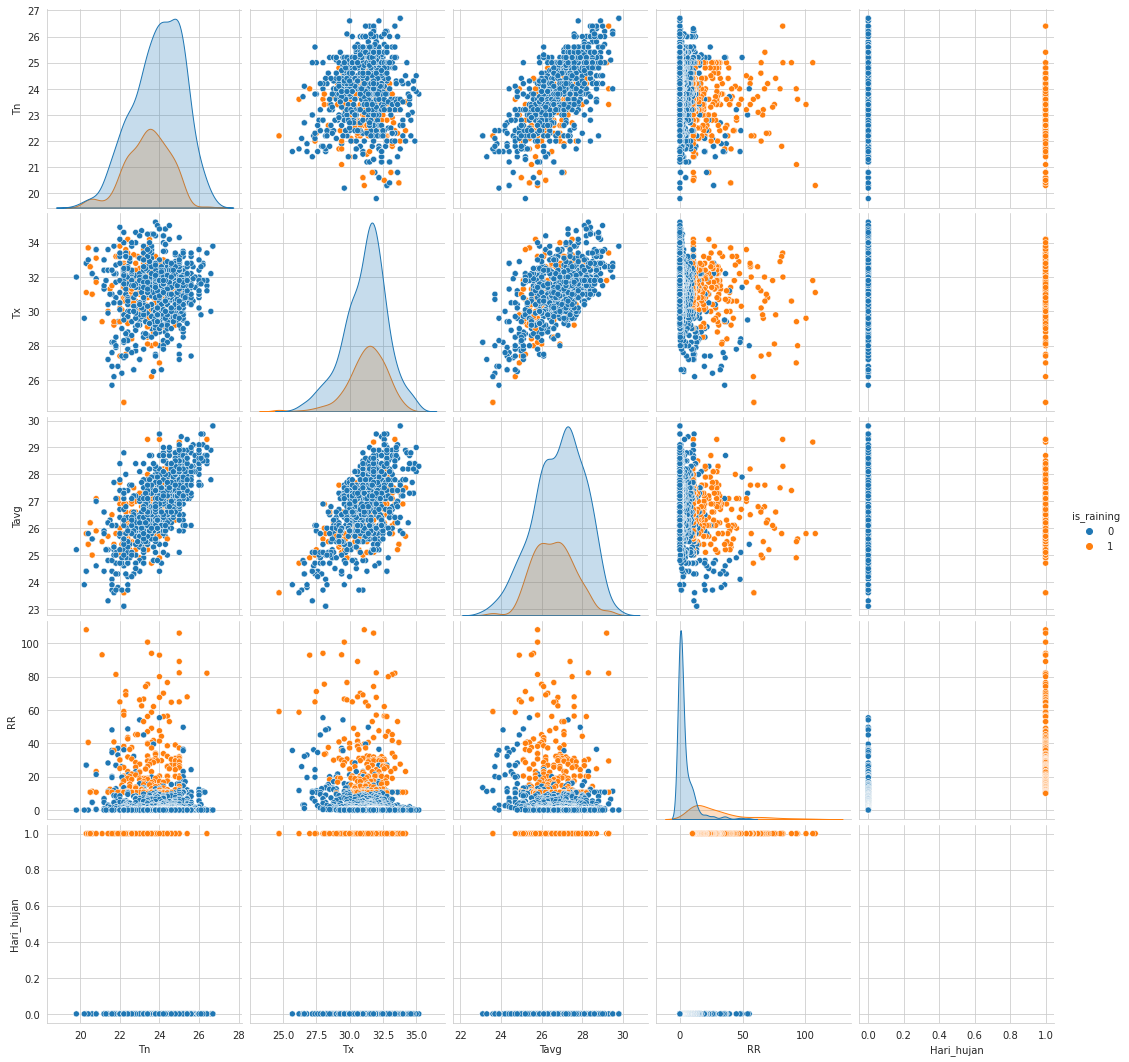

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(raining_dataset,hue="is_raining",size=3);
plt.show()

Initialize functions that later will be used to analyze data.

Initialize lists for storing metrics.

In [ ]:
target_names = ['non-Raining (0)', 'Raining (1)'] # Used for classification report.


<a id="section-one"></a>
# Training & Testing ML Models

I will be training and testing KNN model with different  using *k*-fold cross-validation and differ Way to Calculate Distance with hyper-parameter tuning to reduce the chances of overfitting.

<a id="section-five"></a>
## K Nearest Neighbors (KNN) Classifier with Differ metric
### Choosing a `n_neighbors` value that would produce the highest validation accuracy score.

	####################################################################
result cosine k= 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9928    1.0000    0.9964       548
    Raining (1)     1.0000    0.9789    0.9894       190

       accuracy                         0.9946       738
      macro avg     0.9964    0.9895    0.9929       738
   weighted avg     0.9946    0.9946    0.9946       738
 



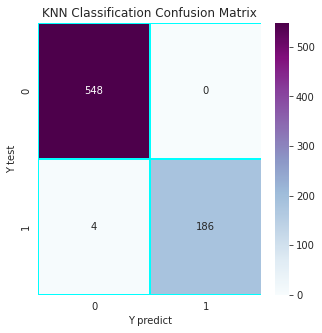

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9786    0.9856    0.9821       139
    Raining (1)     0.9556    0.9348    0.9451        46

       accuracy                         0.9730       185
      macro avg     0.9671    0.9602    0.9636       185
   weighted avg     0.9728    0.9730    0.9729       185
 

	####################################################################
	####################################################################
result cosine k= 3


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9982    0.9891    0.9936       548
    Raining (1)     0.9692    0.9947    0.9818       190

       accuracy                         0.9905       738
      macro avg     0.9837    0.9919    0.9877       738
   weighted avg     0.9907    0.9905    0.9906       738
 



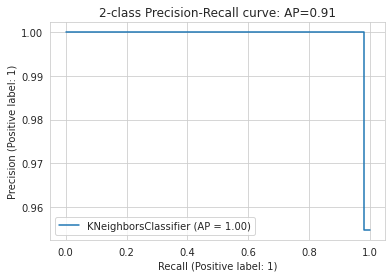

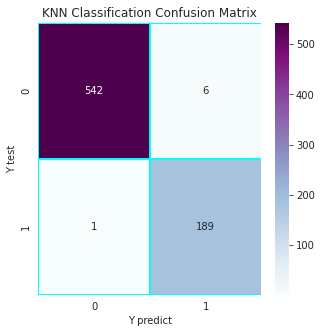

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9925    0.9568    0.9744       139
    Raining (1)     0.8824    0.9783    0.9278        46

       accuracy                         0.9622       185
      macro avg     0.9374    0.9675    0.9511       185
   weighted avg     0.9651    0.9622    0.9628       185
 

	####################################################################
	####################################################################
result cosine k= 4


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9963    0.9927    0.9945       548
    Raining (1)     0.9792    0.9895    0.9843       190

       accuracy                         0.9919       738
      macro avg     0.9878    0.9911    0.9894       738
   weighted avg     0.9919    0.9919    0.9919       738
 



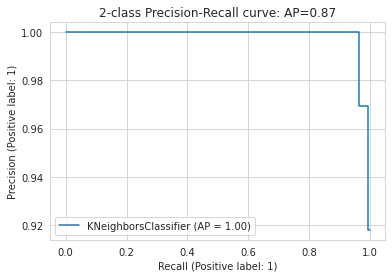

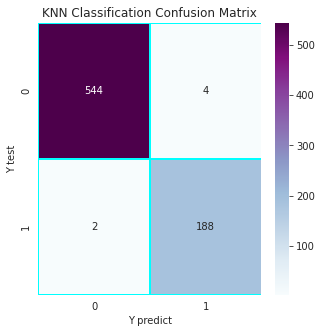

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9853    0.9640    0.9745       139
    Raining (1)     0.8980    0.9565    0.9263        46

       accuracy                         0.9622       185
      macro avg     0.9416    0.9603    0.9504       185
   weighted avg     0.9636    0.9622    0.9626       185
 

	####################################################################
	####################################################################
result manhattan k= 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9982    1.0000    0.9991       548
    Raining (1)     1.0000    0.9947    0.9974       190

       accuracy                         0.9986     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


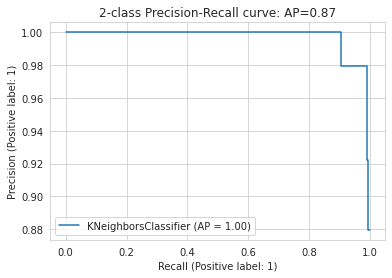

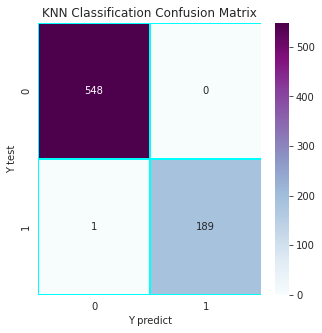

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9928    0.9928    0.9928       139
    Raining (1)     0.9783    0.9783    0.9783        46

       accuracy                         0.9892       185
      macro avg     0.9855    0.9855    0.9855       185
   weighted avg     0.9892    0.9892    0.9892       185
 

	####################################################################
	####################################################################
result manhattan k= 3
Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     1.0000    0.9945    0.9973       548
    Raining (1)     0.9845    1.0000    0.9922       190

       accuracy                         0.9959     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


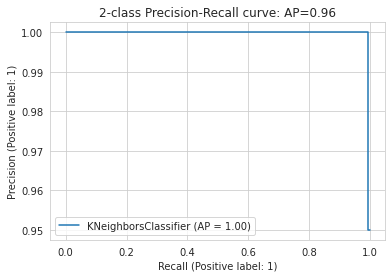

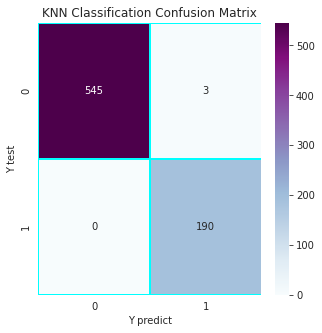

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     1.0000    0.9784    0.9891       139
    Raining (1)     0.9388    1.0000    0.9684        46

       accuracy                         0.9838       185
      macro avg     0.9694    0.9892    0.9788       185
   weighted avg     0.9848    0.9838    0.9840       185
 

	####################################################################
	####################################################################


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


result manhattan k= 4
Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9982    0.9945    0.9963       548
    Raining (1)     0.9844    0.9947    0.9895       190

       accuracy                         0.9946       738
      macro avg     0.9913    0.9946    0.9929       738
   weighted avg     0.9946    0.9946    0.9946       738
 



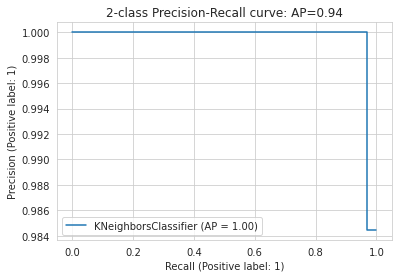

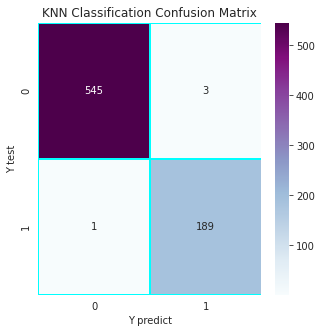

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     1.0000    0.9784    0.9891       139
    Raining (1)     0.9388    1.0000    0.9684        46

       accuracy                         0.9838       185
      macro avg     0.9694    0.9892    0.9788       185
   weighted avg     0.9848    0.9838    0.9840       185
 

	####################################################################
	####################################################################
result euclidean k= 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9946    1.0000    0.9973       548
    Raining (1)     1.0000    0.9842    0.9920       190

       accuracy                         0.9959     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


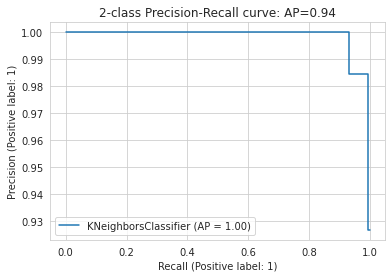

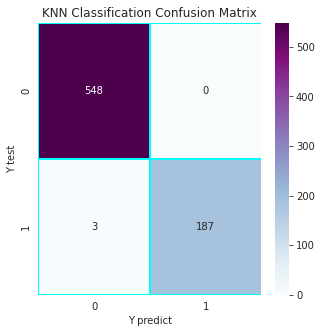

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9714    0.9784    0.9749       139
    Raining (1)     0.9333    0.9130    0.9231        46

       accuracy                         0.9622       185
      macro avg     0.9524    0.9457    0.9490       185
   weighted avg     0.9620    0.9622    0.9620       185
 

	####################################################################
	####################################################################
result euclidean k= 3
Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     1.0000    0.9891    0.9945       548
    Raining (1)     0.9694    1.0000    0.9845       190

       accuracy                         0.9919     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


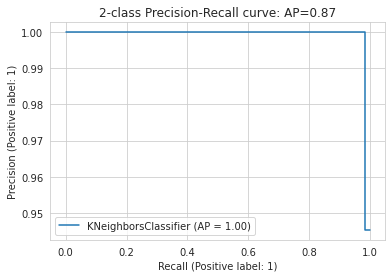

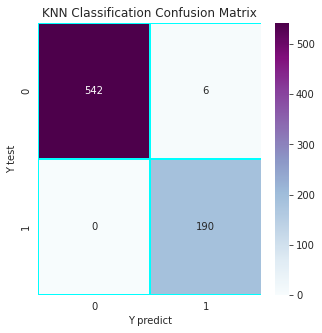

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9852    0.9568    0.9708       139
    Raining (1)     0.8800    0.9565    0.9167        46

       accuracy                         0.9568       185
      macro avg     0.9326    0.9567    0.9437       185
   weighted avg     0.9590    0.9568    0.9573       185
 

	####################################################################
	####################################################################
result euclidean k= 4
Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9963    0.9891    0.9927       548
    Raining (1)     0.9691    0.9895    0.9792       190

       accuracy                         0.9892     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


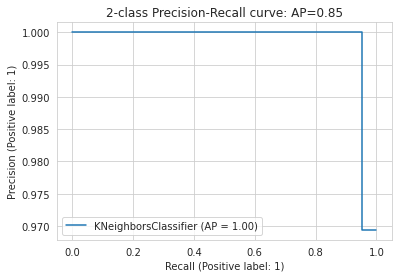

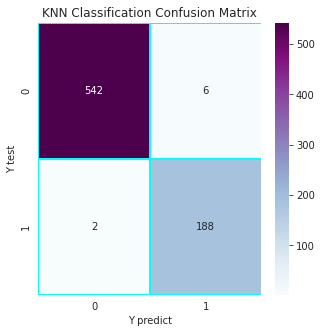

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9853    0.9640    0.9745       139
    Raining (1)     0.8980    0.9565    0.9263        46

       accuracy                         0.9622       185
      macro avg     0.9416    0.9603    0.9504       185
   weighted avg     0.9636    0.9622    0.9626       185
 

	####################################################################


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


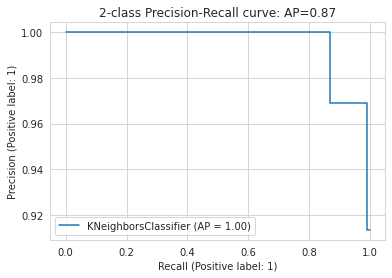

In [ ]:
raining_score=[]
k=[2,3,4]
n_p=2
raining_res=[]
knc=None
met=["cosine","manhattan","euclidean"]
for m in met :
  for n_k in k:
   
      print('\t####################################################################')
      knc=KNeighborsClassifier(algorithm='auto', metric=m,
                          metric_params=None, n_jobs=2, n_neighbors=n_k, p=n_p,
                          weights='uniform')

      knc.fit(X_train, y_train)
      score = knc.score(X_train, y_train)
      raining_res.append([m,n_k,round(score,3),n_p,"Raining"])
      
      print('result',m,"k=",n_k)
      

      y_train_predicted = knc.predict(X_train)
      y_test_predicted = knc.predict(X_test)
      score = knc.score(X_test, y_test)
      raining_score.append([m,n_k,round(score,3),n_p,"Raining"])

      # Display classification report for training and testing data.
      print(f'Classification Report with n_neighbors = {n_k}\n')
      print('\t\t     KNN Classifier (Train)')
      print('\t---------------------------------------------')
      print(classification_report(y_train, y_train_predicted, 
                                  target_names=target_names, digits=4), '\n')
      knncla_cm = confusion_matrix(y_train, y_train_predicted)
      f, ax = plt.subplots(figsize=(5,5))
      sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
      plt.title('KNN Classification Confusion Matrix')
      plt.xlabel('Y predict')
      plt.ylabel('Y test')
      plt.show()
      
      
      print('\t####################################################################')
      print('\t\t     KNN Classifier (Test)')
      print('\t---------------------------------------------')
      print(classification_report(y_test, y_test_predicted, 
                                  target_names=target_names, digits=4), '\n')
      print('\t####################################################################')
      average_precision = average_precision_score(y_test, y_test_predicted)
      disp = plot_precision_recall_curve(knc,X_train, y_train)
  
      disp.ax_.set_title('2-class Precision-Recall curve: '
                  'AP={0:0.2f}'.format(average_precision))
     


## Result Score

In [ ]:
print("score of model :")
print(raining_score)
print(raining_res)


score of model :
[['cosine', 2, 0.973, 2, 'Raining'], ['cosine', 3, 0.962, 2, 'Raining'], ['cosine', 4, 0.962, 2, 'Raining'], ['manhattan', 2, 0.989, 2, 'Raining'], ['manhattan', 3, 0.984, 2, 'Raining'], ['manhattan', 4, 0.984, 2, 'Raining'], ['euclidean', 2, 0.962, 2, 'Raining'], ['euclidean', 3, 0.957, 2, 'Raining'], ['euclidean', 4, 0.962, 2, 'Raining']]
[['cosine', 2, 0.995, 2, 'Raining'], ['cosine', 3, 0.991, 2, 'Raining'], ['cosine', 4, 0.992, 2, 'Raining'], ['manhattan', 2, 0.999, 2, 'Raining'], ['manhattan', 3, 0.996, 2, 'Raining'], ['manhattan', 4, 0.995, 2, 'Raining'], ['euclidean', 2, 0.996, 2, 'Raining'], ['euclidean', 3, 0.992, 2, 'Raining'], ['euclidean', 4, 0.989, 2, 'Raining']]


#Working With Tumor Dataset

In [ ]:
tumor_dataset.info()
tumor_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
tumor_dataset.drop(["id","Unnamed: 32"],axis=1,inplace=True)

# Check for any null values in each column
print(f'Null Values: {sum(tumor_dataset.isnull().sum())}')
tumor_dataset

Null Values: 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
tumor_dataset.diagnosis = [1 if each == "M" else 0 for each in tumor_dataset.diagnosis]
y = tumor_dataset.diagnosis.values
X = tumor_dataset.drop(["diagnosis"],axis=1)

In [ ]:
tumor_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Separate dataset into features (inputs) and targets (outputs). Verify all features are numerical and split dataset into training (80%) and testing (20%).

In [ ]:


test_data_fraction = 0.20 # Allocate 20% of the data for testing.
random_seed = 25

# Verify all features are numerical
print(f'Feature Datatypes\n-----------------\n'
      f'{X.dtypes.value_counts()}\n')

# Split data into training (80%) and testing (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_fraction, 
                                                    random_state=random_seed)
# Obtain shape of training and testing data.
print('Training Shape\n--------------')
print(f'Input: {X_train.shape}')
print(f'Output: {y_train.shape}')

print('\nTesting Shape\n--------------')
print(f'Input: {X_test.shape}')
print(f'Output: {y_test.shape}')


Feature Datatypes
-----------------
float64    30
dtype: int64

Training Shape
--------------
Input: (455, 30)
Output: (455,)

Testing Shape
--------------
Input: (114, 30)
Output: (114,)


<a id="section-one"></a>
# Training & Testing ML Models

	####################################################################
result cosine k= 2 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9126    1.0000    0.9543       282
    Raining (1)     1.0000    0.8439    0.9154       173

       accuracy                         0.9407       455
      macro avg     0.9563    0.9220    0.9348       455
   weighted avg     0.9458    0.9407    0.9395       455
 



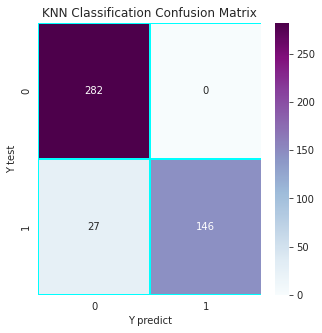

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9136    0.9867    0.9487        75
    Raining (1)     0.9697    0.8205    0.8889        39

       accuracy                         0.9298       114
      macro avg     0.9416    0.9036    0.9188       114
   weighted avg     0.9328    0.9298    0.9283       114
 

	####################################################################
	####################################################################
result cosine k= 3 2
Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9579    0.9681    0.9630       282
    Raining (1)     0.9471    0.9306    0.9388       173

       accuracy                         0.9538      

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


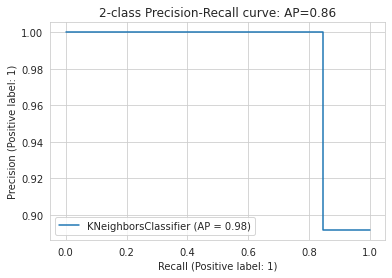

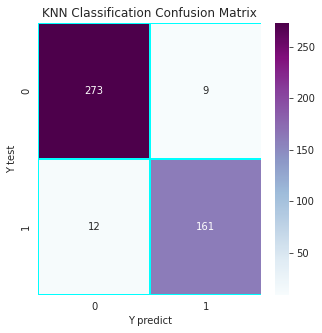

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9351    0.9600    0.9474        75
    Raining (1)     0.9189    0.8718    0.8947        39

       accuracy                         0.9298       114
      macro avg     0.9270    0.9159    0.9211       114
   weighted avg     0.9295    0.9298    0.9294       114
 

	####################################################################
	####################################################################
result cosine k= 4 2
Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9295    0.9823    0.9552       282
    Raining (1)     0.9682    0.8786    0.9212       173

       accuracy                         0.9429      

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


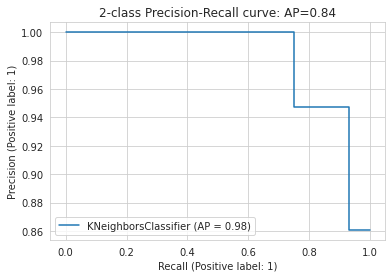

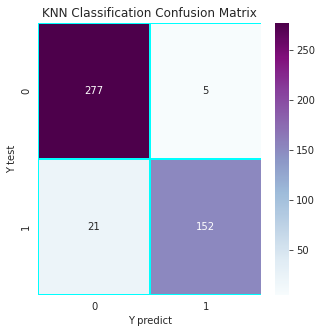

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9125    0.9733    0.9419        75
    Raining (1)     0.9412    0.8205    0.8767        39

       accuracy                         0.9211       114
      macro avg     0.9268    0.8969    0.9093       114
   weighted avg     0.9223    0.9211    0.9196       114
 

	####################################################################
	####################################################################
result manhattan k= 2 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9369    1.0000    0.9674       282
    Raining (1)     1.0000    0.8902    0.9419       173

       accuracy                         0.9582   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


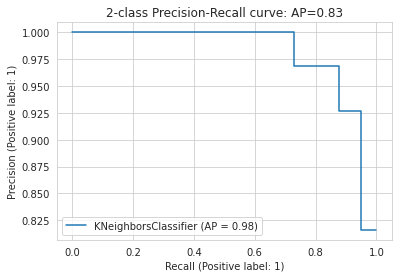

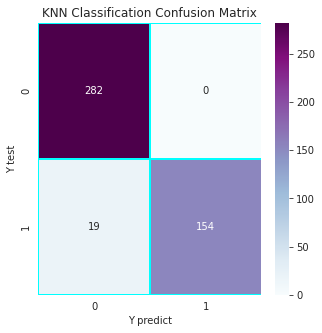

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9024    0.9867    0.9427        75
    Raining (1)     0.9688    0.7949    0.8732        39

       accuracy                         0.9211       114
      macro avg     0.9356    0.8908    0.9080       114
   weighted avg     0.9251    0.9211    0.9189       114
 

	####################################################################
	####################################################################
result manhattan k= 3 2
Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9588    0.9894    0.9738       282
    Raining (1)     0.9817    0.9306    0.9555       173

       accuracy                         0.9670   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


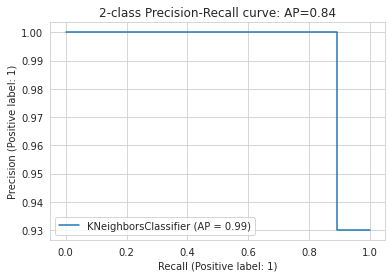

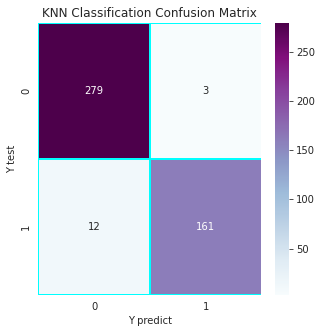

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9221    0.9467    0.9342        75
    Raining (1)     0.8919    0.8462    0.8684        39

       accuracy                         0.9123       114
      macro avg     0.9070    0.8964    0.9013       114
   weighted avg     0.9118    0.9123    0.9117       114
 

	####################################################################
	####################################################################
result manhattan k= 4 2
Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9274    0.9965    0.9607       282
    Raining (1)     0.9934    0.8728    0.9292       173

       accuracy                         0.9495   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


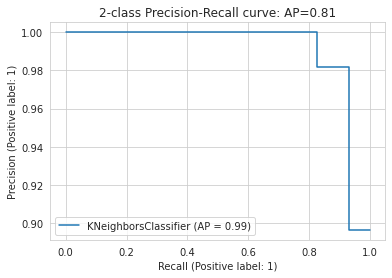

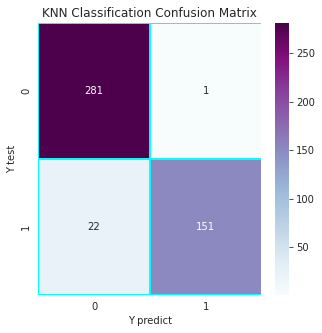

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9136    0.9867    0.9487        75
    Raining (1)     0.9697    0.8205    0.8889        39

       accuracy                         0.9298       114
      macro avg     0.9416    0.9036    0.9188       114
   weighted avg     0.9328    0.9298    0.9283       114
 

	####################################################################
	####################################################################
result euclidean k= 2 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9307    1.0000    0.9641       282
    Raining (1)     1.0000    0.8786    0.9354       173

       accuracy                         0.9538   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


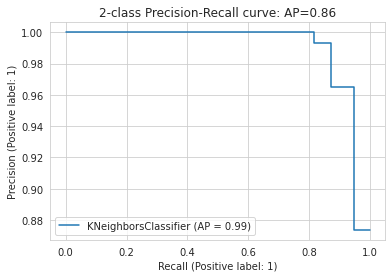

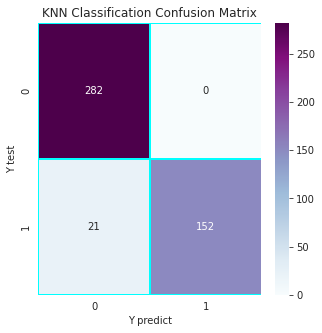

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9024    0.9867    0.9427        75
    Raining (1)     0.9688    0.7949    0.8732        39

       accuracy                         0.9211       114
      macro avg     0.9356    0.8908    0.9080       114
   weighted avg     0.9251    0.9211    0.9189       114
 

	####################################################################
	####################################################################
result euclidean k= 3 2
Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9586    0.9858    0.9720       282
    Raining (1)     0.9758    0.9306    0.9527       173

       accuracy                         0.9648   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


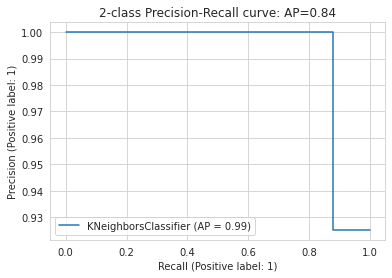

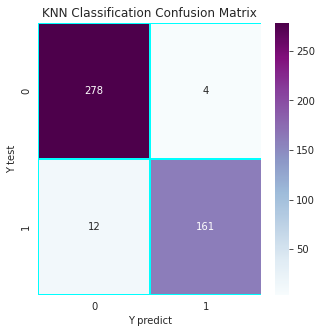

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9103    0.9467    0.9281        75
    Raining (1)     0.8889    0.8205    0.8533        39

       accuracy                         0.9035       114
      macro avg     0.8996    0.8836    0.8907       114
   weighted avg     0.9029    0.9035    0.9025       114
 

	####################################################################
	####################################################################
result euclidean k= 4 2
Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9302    0.9929    0.9605       282
    Raining (1)     0.9870    0.8786    0.9297       173

       accuracy                         0.9495   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


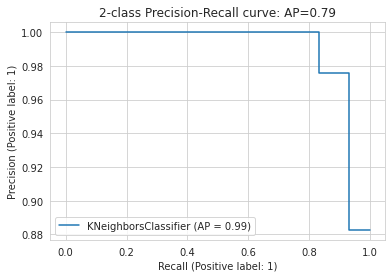

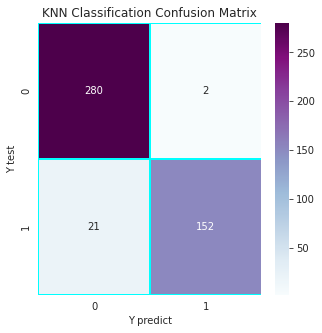

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

non-Raining (0)     0.9012    0.9733    0.9359        75
    Raining (1)     0.9394    0.7949    0.8611        39

       accuracy                         0.9123       114
      macro avg     0.9203    0.8841    0.8985       114
   weighted avg     0.9143    0.9123    0.9103       114
 

	####################################################################


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


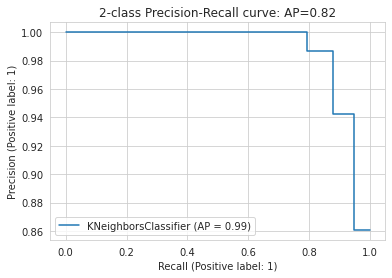

In [ ]:
knc=None
tumor_score=[]
k=[2,3,4]
tumor_res = []
n_p=2
met=["cosine","manhattan","euclidean"]
for m in met :
  for n_k in k:
     
      print('\t####################################################################')
      knc=KNeighborsClassifier(algorithm='auto', metric=m,
                          metric_params=None, n_jobs=2, n_neighbors=n_k, p=n_p,
                          weights='uniform')

      knc.fit(X_train, y_train)
      
      score = knc.score(X_train, y_train)
      tumor_res.append([m,n_k,round(score,3),n_p,"Tumor"])
    
      print('result',m,"k=",n_k,n_p)

      y_train_predicted = knc.predict(X_train)
      y_test_predicted = knc.predict(X_test)
      score = knc.score(X_test, y_test)
      tumor_score.append([m,n_k,round(score,3),n_p,"Tumor"])
      
      # Display classification report for training and testing data.
      print(f'Classification Report with n_neighbors = {n_k}\n')
      print('\t\t     KNN Classifier (Train)')
      print('\t---------------------------------------------')
      print(classification_report(y_train, y_train_predicted, 
                                  target_names=target_names, digits=4), '\n')
      knncla_cm = confusion_matrix(y_train, y_train_predicted)
      f, ax = plt.subplots(figsize=(5,5))
      sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
      plt.title('KNN Classification Confusion Matrix')
      plt.xlabel('Y predict')
      plt.ylabel('Y test')
      plt.show()
      
      
      print('\t####################################################################')
      print('\t\t     KNN Classifier (Test)')
      print('\t---------------------------------------------')
      print(classification_report(y_test, y_test_predicted, 
                                  target_names=target_names, digits=4), '\n')
      print('\t####################################################################')
      average_precision = average_precision_score(y_test, y_test_predicted)
      disp = plot_precision_recall_curve(knc,X_train, y_train)
  
      disp.ax_.set_title('2-class Precision-Recall curve: '
                  'AP={0:0.2f}'.format(average_precision))
    


In [ ]:
print("score of model :")
print(tumor_score)

print(tumor_res)

score of model :
[['cosine', 2, 0.93, 2, 'Tumor'], ['cosine', 3, 0.93, 2, 'Tumor'], ['cosine', 4, 0.921, 2, 'Tumor'], ['manhattan', 2, 0.921, 2, 'Tumor'], ['manhattan', 3, 0.912, 2, 'Tumor'], ['manhattan', 4, 0.93, 2, 'Tumor'], ['euclidean', 2, 0.921, 2, 'Tumor'], ['euclidean', 3, 0.904, 2, 'Tumor'], ['euclidean', 4, 0.912, 2, 'Tumor']]
[['cosine', 2, 0.941, 2, 'Tumor'], ['cosine', 3, 0.954, 2, 'Tumor'], ['cosine', 4, 0.943, 2, 'Tumor'], ['manhattan', 2, 0.958, 2, 'Tumor'], ['manhattan', 3, 0.967, 2, 'Tumor'], ['manhattan', 4, 0.949, 2, 'Tumor'], ['euclidean', 2, 0.954, 2, 'Tumor'], ['euclidean', 3, 0.965, 2, 'Tumor'], ['euclidean', 4, 0.949, 2, 'Tumor']]


#Working With Iris Dataset

In [ ]:
iris_dataset.info()
iris_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


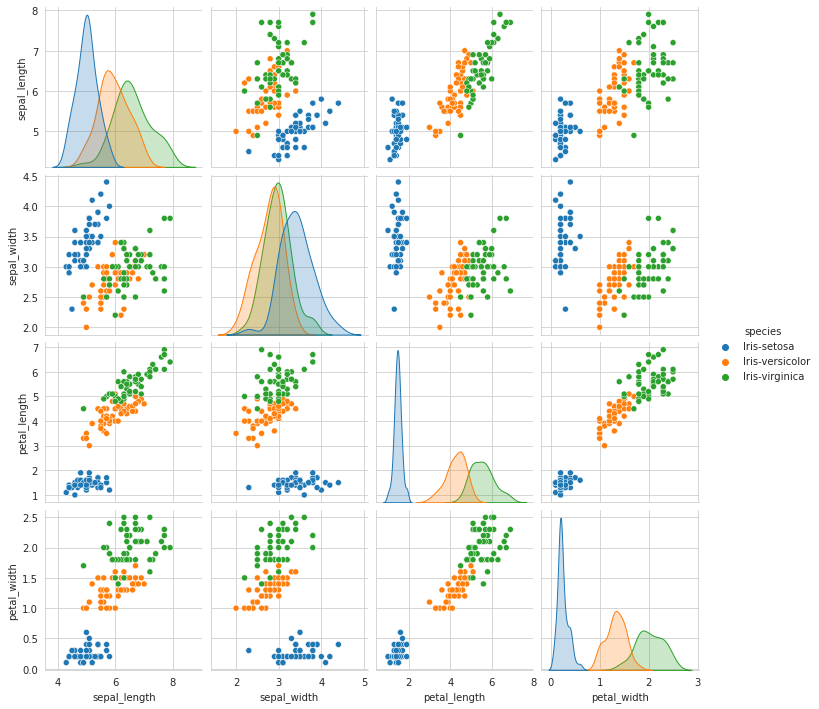

In [ ]:
sns.pairplot(iris_dataset,hue="species")

Replace Coloum Value To Numeric Value To Train The model

In [ ]:
iris_dataset['species'].replace(['Iris-versicolor','Iris-setosa','Iris-virginica'], [2,1,0], inplace=True)
inp = iris_dataset.drop(iris_dataset.columns[[4]], axis=1)
inp
target_names=['Iris-versicolor','Iris-setosa','Iris-virginica']

Separate dataset into features (inputs) and targets (outputs). Verify all features are numerical and split dataset into training (80%) and testing (20%).

In [ ]:
knc=None
test_data_fraction = 0.20 # Allocate 20% of the data for testing.
random_seed = 25
y = iris_dataset['species']
X = inp
# Verify all features are numerical
print(f'Feature Datatypes\n-----------------\n'
      f'{X.value_counts()}\n')

# Split data into training (80%) and testing (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_fraction, 
                                                    random_state=random_seed)
# Obtain shape of training and testing data.
print('Training Shape\n--------------')
print(f'Input: {X_train.shape}')
print(f'Output: {y_train.shape}')

print('\nTesting Shape\n--------------')
print(f'Input: {X_test.shape}')
print(f'Output: {y_test.shape}')


Feature Datatypes
-----------------
sepal_length  sepal_width  petal_length  petal_width
4.9           3.1          1.5           0.1            3
5.8           2.7          5.1           1.9            2
              4.0          1.2           0.2            1
5.9           3.0          4.2           1.5            1
6.2           3.4          5.4           2.3            1
                                                       ..
5.5           2.3          4.0           1.3            1
              2.4          3.7           1.0            1
                           3.8           1.1            1
              2.5          4.0           1.3            1
7.9           3.8          6.4           2.0            1
Length: 147, dtype: int64

Training Shape
--------------
Input: (120, 4)
Output: (120,)

Testing Shape
--------------
Input: (30, 4)
Output: (30,)


<a id="section-one"></a>
# Training & Testing ML Models

	####################################################################
result cosine k= 2 p= 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9545    1.0000    0.9767        42
    Iris-setosa     1.0000    1.0000    1.0000        41
 Iris-virginica     1.0000    0.9459    0.9722        37

       accuracy                         0.9833       120
      macro avg     0.9848    0.9820    0.9830       120
   weighted avg     0.9841    0.9833    0.9833       120
 



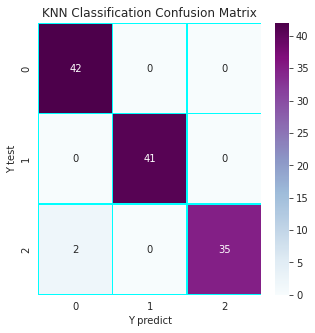

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################
	####################################################################
result cosine k= 3 p= 2
Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9535    0.9762    0.9647        42
    Iris-setosa     1.0000    1.0000    1.0000    

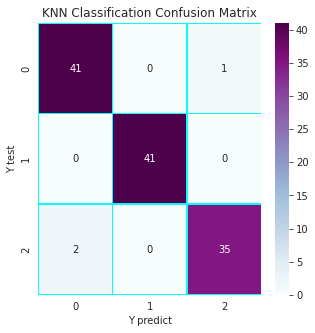

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################
	####################################################################
result cosine k= 4 p= 2
Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9535    0.9762    0.9647        42
    Iris-setosa     1.0000    1.0000    1.0000    

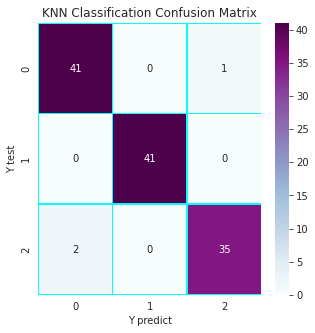

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################
	####################################################################
result manhattan k= 2 p= 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9767    1.0000    0.9882        42
    Iris-setosa     1.0000    1.0000    1.0000 

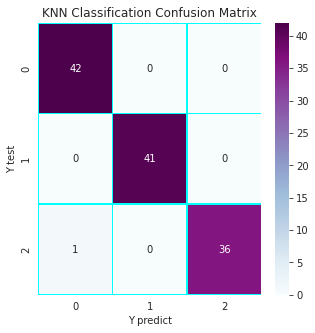

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################
	####################################################################
result manhattan k= 3 p= 2
Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9756    0.9524    0.9639        42
    Iris-setosa     1.0000    1.0000    1.0000 

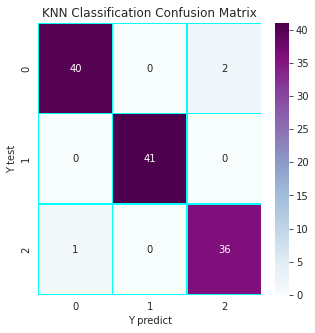

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################
	####################################################################
result manhattan k= 4 p= 2
Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9762    0.9762    0.9762        42
    Iris-setosa     1.0000    1.0000    1.0000 

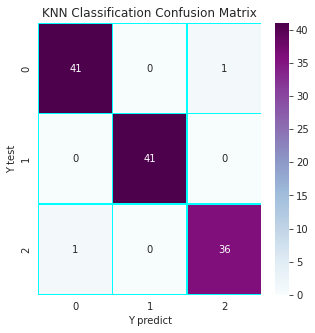

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################
	####################################################################
result euclidean k= 2 p= 2
Classification Report with n_neighbors = 2

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9767    1.0000    0.9882        42
    Iris-setosa     1.0000    1.0000    1.0000 

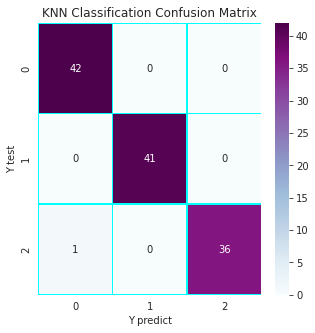

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################
	####################################################################
result euclidean k= 3 p= 2
Classification Report with n_neighbors = 3

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9756    0.9524    0.9639        42
    Iris-setosa     1.0000    1.0000    1.0000 

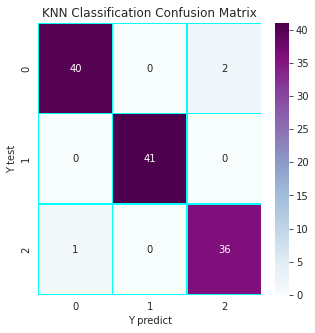

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################
	####################################################################
result euclidean k= 4 p= 2
Classification Report with n_neighbors = 4

		     KNN Classifier (Train)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.9762    0.9762    0.9762        42
    Iris-setosa     1.0000    1.0000    1.0000 

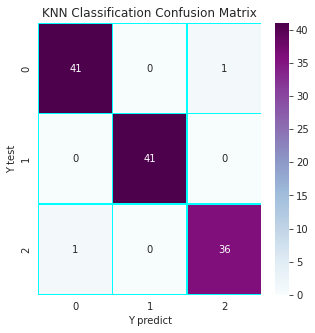

	####################################################################
		     KNN Classifier (Test)
	---------------------------------------------
                 precision    recall  f1-score   support

Iris-versicolor     0.8000    1.0000    0.8889         8
    Iris-setosa     1.0000    1.0000    1.0000         9
 Iris-virginica     1.0000    0.8462    0.9167        13

       accuracy                         0.9333        30
      macro avg     0.9333    0.9487    0.9352        30
   weighted avg     0.9467    0.9333    0.9343        30
 

	####################################################################


In [ ]:
iris_score=[]
iris_res=[]
k=[2,3,4]
n_p=2
met=["cosine","manhattan","euclidean"]
for m in met :
  for n_k in k:
    
    print('\t####################################################################')
    knc=KNeighborsClassifier(algorithm='auto', metric=m,
                        metric_params=None, n_jobs=2, n_neighbors=n_k, p=n_p,
                        weights='uniform')

    knc.fit(X_train, y_train)
    
    score = knc.score(X_train, y_train)
    iris_res.append([m,n_k,round(score,3),n_p,"iris"])
  
    print('result',m,"k=",n_k,"p=",n_p)
    
    y_train_predicted = knc.predict(X_train)
    y_test_predicted = knc.predict(X_test)
    score = knc.score(X_test, y_test)
    iris_score.append([m,n_k,round(score,3),n_p,"iris"])

    # Display classification report for training and testing data.
    print(f'Classification Report with n_neighbors = {n_k}\n')
    print('\t\t     KNN Classifier (Train)')
    print('\t---------------------------------------------')
    print(classification_report(y_train, y_train_predicted, 
                                target_names=target_names, digits=4), '\n')
    knncla_cm = confusion_matrix(y_train, y_train_predicted)
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
    plt.title('KNN Classification Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()
    
    
    print('\t####################################################################')
    print('\t\t     KNN Classifier (Test)')
    print('\t---------------------------------------------')
    print(classification_report(y_test, y_test_predicted, 
                                target_names=target_names, digits=4), '\n')
    print('\t####################################################################')

   
   


# Result Score

In [ ]:
print(iris_score)
print(iris_res)

[['cosine', 2, 0.933, 2, 'iris'], ['cosine', 3, 0.933, 2, 'iris'], ['cosine', 4, 0.933, 2, 'iris'], ['manhattan', 2, 0.933, 2, 'iris'], ['manhattan', 3, 0.933, 2, 'iris'], ['manhattan', 4, 0.933, 2, 'iris'], ['euclidean', 2, 0.933, 2, 'iris'], ['euclidean', 3, 0.933, 2, 'iris'], ['euclidean', 4, 0.933, 2, 'iris']]
[['cosine', 2, 0.983, 2, 'iris'], ['cosine', 3, 0.975, 2, 'iris'], ['cosine', 4, 0.975, 2, 'iris'], ['manhattan', 2, 0.992, 2, 'iris'], ['manhattan', 3, 0.975, 2, 'iris'], ['manhattan', 4, 0.983, 2, 'iris'], ['euclidean', 2, 0.992, 2, 'iris'], ['euclidean', 3, 0.975, 2, 'iris'], ['euclidean', 4, 0.983, 2, 'iris']]


<a id="section-ten"></a>
# Comparing ML Models

I will be comparing different metrics to determine which model is the most efficient at KNN Model

# Model vs  Avrege Accuracy

## Compare training  accuracies for all the models.

In [ ]:

euclidean=[]
manhattan=[] 
minkowski=[]     
for list_rain in raining_res :
  if list_rain[0]  =="euclidean" :
   
    euclidean.append(list_rain[2])
  elif list_rain[0]  =="manhattan" :
      manhattan.append(list_rain[2])
  elif list_rain[0]  =="cosine" :
      minkowski.append(list_rain[2])
 
 



for list_tumor in tumor_res :
 
  if list_tumor[0]  =="cosine" :
     minkowski.append(list_tumor[2])
  elif list_tumor[0]  =="euclidean" :
    euclidean.append(list_tumor[2])
  elif list_tumor[0]  =="manhattan" :
     manhattan.append(list_tumor[2])
 
for list_iris in iris_res :
  
  if list_iris[0]  =="manhattan" :
     manhattan.append(list_iris[2])
  elif list_iris[0]  =="cosine" :
     minkowski.append(list_iris[2])
  elif list_iris[0]  =="euclidean" :
    euclidean.append(list_iris[2])
print("Training")
print(" euclidean ",euclidean)
print(" euclidean Score ",sum(euclidean)/len(euclidean))
print(" manhattan ",manhattan)
print(" manhattan Score ",sum(manhattan)/len(manhattan))
print(" minkowski ",minkowski)
print(" minkowski Score ",sum(minkowski)/len(minkowski))


Training
 euclidean  [0.996, 0.992, 0.989, 0.954, 0.965, 0.949, 0.992, 0.975, 0.983]
 euclidean Score  0.9772222222222222
 manhattan  [0.999, 0.996, 0.995, 0.958, 0.967, 0.949, 0.992, 0.975, 0.983]
 manhattan Score  0.9793333333333334
 minkowski  [0.995, 0.991, 0.992, 0.941, 0.954, 0.943, 0.983, 0.975, 0.975]
 minkowski Score  0.9721111111111109


In [ ]:
train_plot=pd.DataFrame(columns=["Distance","K","Acc","P","DataSet"],data=raining_score+tumor_score+iris_score)
train_plot.to_csv()

',Distance,K,Acc,P,DataSet\n0,cosine,2,0.973,2,Raining\n1,cosine,3,0.962,2,Raining\n2,cosine,4,0.962,2,Raining\n3,manhattan,2,0.989,2,Raining\n4,manhattan,3,0.984,2,Raining\n5,manhattan,4,0.984,2,Raining\n6,euclidean,2,0.962,2,Raining\n7,euclidean,3,0.957,2,Raining\n8,euclidean,4,0.962,2,Raining\n9,cosine,2,0.93,2,Tumor\n10,cosine,3,0.93,2,Tumor\n11,cosine,4,0.921,2,Tumor\n12,manhattan,2,0.921,2,Tumor\n13,manhattan,3,0.912,2,Tumor\n14,manhattan,4,0.93,2,Tumor\n15,euclidean,2,0.921,2,Tumor\n16,euclidean,3,0.904,2,Tumor\n17,euclidean,4,0.912,2,Tumor\n18,cosine,2,0.933,2,iris\n19,cosine,3,0.933,2,iris\n20,cosine,4,0.933,2,iris\n21,manhattan,2,0.933,2,iris\n22,manhattan,3,0.933,2,iris\n23,manhattan,4,0.933,2,iris\n24,euclidean,2,0.933,2,iris\n25,euclidean,3,0.933,2,iris\n26,euclidean,4,0.933,2,iris\n'

## Compare testing accuracies for all the models.

In [ ]:

euclidean=[]
manhattan=[] 
cosine=[]     
for list_rain in raining_score :
  if list_rain[0]  =="euclidean" :
   
    euclidean.append(list_rain[2])
  elif list_rain[0]  =="manhattan" :
      manhattan.append(list_rain[2])
  elif list_rain[0]  =="cosine" :
      cosine.append(list_rain[2])
 
 



for list_tumor in tumor_score :
 
  if list_tumor[0]  =="cosine" :
     cosine.append(list_tumor[2])
  elif list_tumor[0]  =="euclidean" :
    euclidean.append(list_tumor[2])
  elif list_tumor[0]  =="manhattan" :
     manhattan.append(list_tumor[2])
 
for list_iris in iris_score :
  
  if list_iris[0]  =="manhattan" :
     manhattan.append(list_iris[2])
  elif list_iris[0]  =="cosine" :
     cosine.append(list_iris[2])
  elif list_iris[0]  =="euclidean" :
    euclidean.append(list_iris[2])

print("Testing")
print(" euclidean ",euclidean)
print(" euclidean Score ",sum(euclidean)/len(euclidean))
print(" manhattan ",manhattan)
print(" manhattan Score ",sum(manhattan)/len(manhattan))
print(" cosine ",cosine)
print(" cosine Score ",sum(cosine)/len(cosine))


Testing
 euclidean  [0.962, 0.957, 0.962, 0.921, 0.904, 0.912, 0.933, 0.933, 0.933]
 euclidean Score  0.9352222222222222
 manhattan  [0.989, 0.984, 0.984, 0.921, 0.912, 0.93, 0.933, 0.933, 0.933]
 manhattan Score  0.9465555555555556
 cosine  [0.973, 0.962, 0.962, 0.93, 0.93, 0.921, 0.933, 0.933, 0.933]
 cosine Score  0.9418888888888889


In [ ]:
test_plot=pd.DataFrame(columns=["Distance","K","Acc","P","DataSet"],data=raining_res+tumor_res+iris_res)

test_plot.to_csv()

',Distance,K,Acc,P,DataSet\n0,cosine,2,0.995,2,Raining\n1,cosine,3,0.991,2,Raining\n2,cosine,4,0.992,2,Raining\n3,manhattan,2,0.999,2,Raining\n4,manhattan,3,0.996,2,Raining\n5,manhattan,4,0.995,2,Raining\n6,euclidean,2,0.996,2,Raining\n7,euclidean,3,0.992,2,Raining\n8,euclidean,4,0.989,2,Raining\n9,cosine,2,0.941,2,Tumor\n10,cosine,3,0.954,2,Tumor\n11,cosine,4,0.943,2,Tumor\n12,manhattan,2,0.958,2,Tumor\n13,manhattan,3,0.967,2,Tumor\n14,manhattan,4,0.949,2,Tumor\n15,euclidean,2,0.954,2,Tumor\n16,euclidean,3,0.965,2,Tumor\n17,euclidean,4,0.949,2,Tumor\n18,cosine,2,0.983,2,iris\n19,cosine,3,0.975,2,iris\n20,cosine,4,0.975,2,iris\n21,manhattan,2,0.992,2,iris\n22,manhattan,3,0.975,2,iris\n23,manhattan,4,0.983,2,iris\n24,euclidean,2,0.992,2,iris\n25,euclidean,3,0.975,2,iris\n26,euclidean,4,0.983,2,iris\n'

<a id="section-eleven"></a>
# Conclusion

All the models performed better than the baseline, but the **Manhattan** model performed the best overall. It has the highest accuracy, F1 score and it has the least amount of cumulative false values (FP + FN). The **Euclidean** and **Minkowski** models are also great choices as well